In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from category_encoders.leave_one_out import LeaveOneOutEncoder
from category_encoders.one_hot import OneHotEncoder
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
import sklearn
import matplotlib.pyplot as plt
import warnings

warnings.simplefilter("ignore")
%matplotlib inline



In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,id,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,0,e,8.80,f,s,u,f,a,c,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,a
1,1,p,4.51,x,h,o,f,a,c,n,...,NaN,y,o,NaN,NaN,t,z,NaN,d,w
2,2,e,6.94,f,s,b,f,x,c,w,...,NaN,s,n,NaN,NaN,f,f,NaN,l,w
3,3,e,3.88,f,y,g,f,s,NaN,g,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
4,4,e,5.85,x,l,w,f,d,NaN,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,g,a


In [4]:
y = df["class"]
y = y.map({"p":-1, "e":1})

In [5]:
X = df.drop(["class"], axis=1)

In [6]:
X.isnull().sum()  

id                            0
cap-diameter                  4
cap-shape                    40
cap-surface              671023
cap-color                    12
does-bruise-or-bleed          8
gill-attachment          523936
gill-spacing            1258435
gill-color                   57
stem-height                   0
stem-width                    0
stem-root               2757023
stem-surface            1980861
stem-color                   38
veil-type               2957493
veil-color              2740947
has-ring                     24
ring-type                128880
spore-print-color       2849682
habitat                      45
season                        0
dtype: int64

In [8]:
X.shape

(3116945, 21)

In [9]:
y.value_counts()

class
-1    1705396
 1    1411549
Name: count, dtype: int64

In [10]:
X = X.drop(["stem-root", "veil-type", "veil-color", "spore-print-color", "id"], axis=1)

In [11]:
X.shape

(3116945, 16)

In [12]:
X.head()

,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-surface,stem-color,has-ring,ring-type,habitat,season
0,8.80,f,s,u,f,a,c,w,4.51,15.39,NaN,w,f,f,d,a
1,4.51,x,h,o,f,a,c,n,4.79,6.48,y,o,t,z,d,w
2,6.94,f,s,b,f,x,c,w,6.85,9.93,s,n,f,f,l,w
3,3.88,f,y,g,f,s,NaN,g,4.16,6.53,NaN,w,f,f,d,u
4,5.85,x,l,w,f,d,NaN,w,3.37,8.36,NaN,w,f,f,g,a


In [13]:
X = X.drop(["gill-spacing", "stem-surface"], axis=1)


In [14]:
X.head()

,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,8.80,f,s,u,f,a,w,4.51,15.39,w,f,f,d,a
1,4.51,x,h,o,f,a,n,4.79,6.48,o,t,z,d,w
2,6.94,f,s,b,f,x,w,6.85,9.93,n,f,f,l,w
3,3.88,f,y,g,f,s,g,4.16,6.53,w,f,f,d,u
4,5.85,x,l,w,f,d,w,3.37,8.36,w,f,f,g,a


### Выделение и преобразование категориальных признаков

In [15]:
cat_cols = ["cap-shape","cap-surface",  "cap-color", "does-bruise-or-bleed", "gill-attachment","gill-color", "stem-color", "has-ring", "ring-type", "habitat", "season"]

In [16]:
encoder = LeaveOneOutEncoder(return_df=True)
X1 = encoder.fit_transform(X,y)
X1.dtypes


cap-diameter            float64
cap-shape               float64
cap-surface             float64
cap-color               float64
does-bruise-or-bleed    float64
gill-attachment         float64
gill-color              float64
stem-height             float64
stem-width              float64
stem-color              float64
has-ring                float64
ring-type               float64
habitat                 float64
season                  float64
dtype: object

In [17]:
X1.head()

,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,8.80,-0.023890,0.261312,-0.078651,-0.111527,-0.292689,0.143119,4.51,15.39,0.164571,-0.066509,-0.093477,-0.057678,-0.143173
1,4.51,-0.020332,0.059745,-0.434519,-0.111526,-0.292686,-0.429756,4.79,6.48,-0.193312,-0.182206,-0.992318,-0.057677,0.307986
2,6.94,-0.023890,0.261312,0.747912,-0.111527,-0.076904,0.143119,6.85,9.93,-0.221857,-0.066509,-0.093477,0.210151,0.307979
3,3.88,-0.023890,0.076031,0.176156,-0.111527,-0.178318,0.038004,4.16,6.53,0.164571,-0.066509,-0.093477,-0.057678,-0.164923
4,5.85,-0.020333,0.142360,0.005880,-0.111527,-0.142756,0.143119,3.37,8.36,0.164571,-0.066509,-0.093477,-0.349208,-0.143173


In [18]:
X1.isnull().sum()

cap-diameter            4
cap-shape               0
cap-surface             0
cap-color               0
does-bruise-or-bleed    0
gill-attachment         0
gill-color              0
stem-height             0
stem-width              0
stem-color              0
has-ring                0
ring-type               0
habitat                 0
season                  0
dtype: int64

In [19]:
X1.fillna(X1.mean(), inplace=True) # избавимся от пропусков в cap-diameter


In [20]:
X1.isnull().sum()

cap-diameter            0
cap-shape               0
cap-surface             0
cap-color               0
does-bruise-or-bleed    0
gill-attachment         0
gill-color              0
stem-height             0
stem-width              0
stem-color              0
has-ring                0
ring-type               0
habitat                 0
season                  0
dtype: int64

**Посмотрим на корреляцию признаков между собой**

In [21]:
X_corr = X1

In [23]:
X_corr.insert (loc= len(X_corr.columns) , column='class', value=y)

ValueError: cannot insert class, already exists

In [24]:
plt.rcParams["figure.figsize"] = (15,15)

<Axes: >

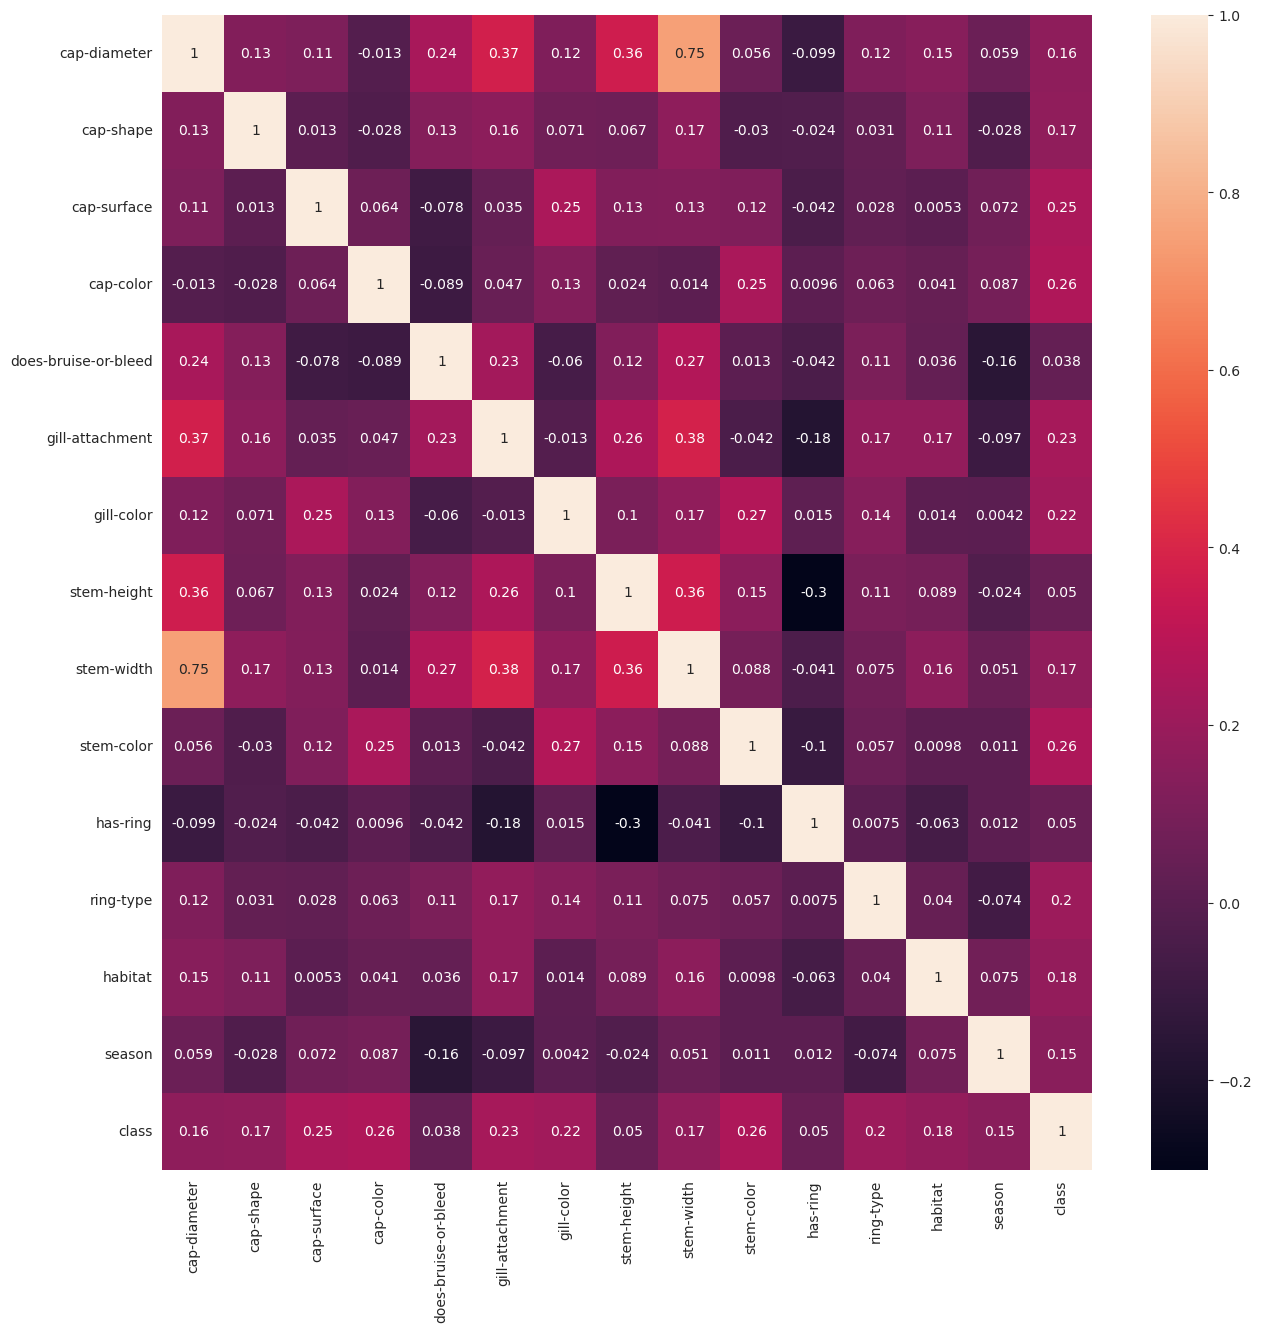

In [25]:
sns.heatmap(X_corr.corr(), annot = True)

**Разделим выборку**

In [26]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X1, y, test_size=0.3, random_state=42)

**Обучим линейную модель**

In [27]:
model = LogisticRegression()
model.fit(Xtrain, ytrain)

y_train = model.predict(Xtrain)
y_pred = model.predict(Xtest)


print(accuracy_score(ytest, y_pred))

1.0


** Закодируем категориальные признаки с помощью OneHotEncoder**

In [28]:
X3 = X.iloc[:1600000]
y1 = y.iloc[:1600000]

In [29]:
encoder_2 = OneHotEncoder(return_df=True)
X4 = encoder_2.fit_transform(X3,y1)

In [ ]:
X4.head()

In [ ]:
X4.isnull().sum()

In [30]:
X4.fillna(X4.mean(), inplace=True) # избавимся от пропусков в cap-diameter

In [ ]:
X4.isnull().sum()

In [31]:
Xtrain_1, Xtest_1, ytrain_1, ytest_1 = train_test_split(X4, y1, test_size=0.3, random_state=42)

In [32]:
model2 = LogisticRegression()
model2.fit(Xtrain_1, ytrain_1)

y_train = model2.predict(Xtrain_1)
y_pred = model2.predict(Xtest_1)


print(accuracy_score(ytest_1, y_pred))

0.77424375


**Масштабируем числовые признаки**

In [35]:
scaler = StandardScaler()
scaler.fit_transform(Xtrain_1)

array([[ 0.11613042, -0.5259463 ,  1.08203089, ..., -0.31289722,
        -0.76505178, -0.21795036],
       [ 1.1169338 , -0.5259463 ,  1.08203089, ..., -0.31289722,
         1.30710107, -0.21795036],
       [ 0.84203502, -0.5259463 ,  1.08203089, ..., -0.31289722,
        -0.76505178,  4.58820062],
       ...,
       [ 0.20847923,  1.90133479, -0.92418803, ..., -0.31289722,
        -0.76505178, -0.21795036],
       [ 0.03022455, -0.5259463 ,  1.08203089, ..., -0.31289722,
         1.30710107, -0.21795036],
       [-1.00494119,  1.90133479, -0.92418803, ..., -0.31289722,
        -0.76505178, -0.21795036]])

In [39]:
X1

,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season,class
0,8.80,-0.023890,0.261312,-0.078651,-0.111527,-0.292689,0.143119,4.51,15.39,0.164571,-0.066509,-0.093477,-0.057678,-0.143173,1
1,4.51,-0.020332,0.059745,-0.434519,-0.111526,-0.292686,-0.429756,4.79,6.48,-0.193312,-0.182206,-0.992318,-0.057677,0.307986,-1
2,6.94,-0.023890,0.261312,0.747912,-0.111527,-0.076904,0.143119,6.85,9.93,-0.221857,-0.066509,-0.093477,0.210151,0.307979,1
3,3.88,-0.023890,0.076031,0.176156,-0.111527,-0.178318,0.038004,4.16,6.53,0.164571,-0.066509,-0.093477,-0.057678,-0.164923,1
4,5.85,-0.020333,0.142360,0.005880,-0.111527,-0.142756,0.143119,3.37,8.36,0.164571,-0.066509,-0.093477,-0.349208,-0.143173,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3116940,9.29,-0.023890,-0.027656,0.018169,-0.013248,-0.277945,0.143119,12.14,18.81,0.164571,-0.182209,0.157052,-0.057678,-0.164923,1
3116941,10.88,-0.098917,-0.027656,0.005880,-0.013248,-0.142756,-0.180421,6.65,26.97,0.164571,-0.066509,-0.093477,-0.057678,-0.164923,1
3116942,7.82,-0.020332,0.043146,-0.586495,-0.111526,-0.292686,0.143122,9.51,11.06,-0.387550,-0.182206,-0.992318,-0.057677,-0.143172,-1
3116943,9.45,0.081185,-0.643844,0.018169,-0.013248,0.302067,-0.180421,9.13,17.77,0.164571,-0.182209,-0.028296,-0.057678,-0.164923,1


In [33]:
X_sc = X1.copy()

In [42]:
X_sc = X_sc.drop(["class"], axis=1)

In [43]:
X_sc.describe()

,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
count,3.116945e+06,3.116945e+06,3.116945e+06,3.116945e+06,3.116945e+06,3.116945e+06,3.116945e+06,3.116945e+06,3.116945e+06,3.116945e+06,3.116945e+06,3.116945e+06,3.116945e+06,3.116945e+06
mean,6.309848e+00,-9.427835e-02,-9.427567e-02,-9.427841e-02,-9.427551e-02,-9.427404e-02,-9.427594e-02,6.348333e+00,1.115379e+01,-9.427664e-02,-9.427323e-02,-9.427318e-02,-9.427512e-02,-9.427404e-02
std,4.657928e+00,1.667941e-01,2.517326e-01,2.574025e-01,3.753081e-02,2.322836e-01,2.190434e-01,2.699755e+00,8.095477e+00,2.561708e-01,4.952452e-02,2.016965e-01,1.768859e-01,1.485441e-01
min,3.000000e-02,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.649230e-01
25%,3.320000e+00,-9.891139e-02,-2.847891e-01,-2.458966e-01,-1.115271e-01,-2.779448e-01,-1.804205e-01,4.670000e+00,4.970000e+00,-2.218567e-01,-6.650867e-02,-9.347727e-02,-5.767800e-02,-1.649212e-01
50%,5.750000e+00,-2.388660e-02,-2.765632e-02,1.816863e-02,-1.115264e-01,-1.427563e-01,-1.547640e-01,5.880000e+00,9.650000e+00,-2.218547e-01,-6.650867e-02,-9.347646e-02,-5.767800e-02,-1.431732e-01
75%,8.240000e+00,-2.033182e-02,5.974499e-02,1.817010e-02,-1.115264e-01,-7.689878e-02,1.431194e-01,7.410000e+00,1.563000e+01,1.645713e-01,-6.650783e-02,-9.347646e-02,-5.767708e-02,-1.431719e-01
max,8.067000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,5.000000e-01,1.000000e+00,8.872000e+01,1.029000e+02,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,3.079860e-01


In [44]:
num_cols = X_sc.columns[X_sc.dtypes == 'float64'].tolist()

In [45]:

from sklearn.base import TransformerMixin

class CustomScaler(TransformerMixin):
    def __init__(self, cols, scaler=None):
        self.cols = cols
        self.scaler = scaler or StandardScaler()

    def fit(self, X, y=None):
        num_cols = X.copy()[self.cols]
        self.scaler.fit(num_cols)
        return self
    def transform(self, X, y=None):
        X_res = X.copy()
        num_cols_tr = self.scaler.transform(X_res[self.cols])
        for i, col in enumerate(self.cols):
            X_res[col] = num_cols_tr[:,i]
        return X_res

In [46]:
sc = CustomScaler(num_cols)
X2_sc = sc.fit_transform(X_sc)

In [39]:
X2_sc.describe()

,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season,class
count,3.116945e+06,3.116945e+06,3.116945e+06,3.116945e+06,3.116945e+06,3.116945e+06,3.116945e+06,3.116945e+06,3.116945e+06,3.116945e+06,3.116945e+06,3.116945e+06,3.116945e+06,3.116945e+06,3.116945e+06
mean,9.935327e-16,-5.535082e-16,-1.359151e-16,2.777343e-16,6.952425e-16,2.538212e-16,-5.760752e-16,1.106246e-15,1.969617e-15,1.702232e-16,2.805508e-16,1.851410e-16,2.442833e-17,3.115729e-16,-9.427404e-02
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,9.955464e-01
min,-1.348207e+00,-5.430180e+00,-3.597962e+00,-3.518699e+00,-2.413283e+01,-3.899226e+00,-4.134907e+00,-2.351448e+00,-1.377780e+00,-3.535623e+00,-1.828845e+01,-4.490543e+00,-5.120391e+00,-4.756093e-01,-1.000000e+00
25%,-6.418839e-01,-2.777702e-02,-7.568089e-01,-5.890315e-01,-4.596663e-01,-7.907178e-01,-3.932763e-01,-6.216615e-01,-7.638569e-01,-4.980273e-01,5.606225e-01,3.946073e-03,2.068968e-01,-4.755977e-01,-1.000000e+00
50%,-1.201926e-01,4.220280e-01,2.646433e-01,4.368531e-01,-4.596455e-01,-2.087201e-01,-2.761467e-01,-1.734726e-01,-1.857563e-01,-4.980196e-01,5.606225e-01,3.950076e-03,2.068968e-01,-3.291894e-01,-1.000000e+00
75%,4.143800e-01,4.433404e-01,6.118424e-01,4.368588e-01,-4.596455e-01,7.480195e-02,1.083782e+00,3.932456e-01,5.529279e-01,1.010451e+00,5.606396e-01,3.950076e-03,2.069020e-01,-3.291806e-01,1.000000e+00
max,1.596422e+01,6.560657e+00,4.346977e+00,4.251236e+00,2.915673e+01,2.558399e+00,4.995704e+00,3.051080e+01,1.133302e+01,4.271668e+00,2.209559e+01,5.425346e+00,6.186334e+00,2.708018e+00,1.000000e+00


In [41]:
X

,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,8.80,f,s,u,f,a,w,4.51,15.39,w,f,f,d,a
1,4.51,x,h,o,f,a,n,4.79,6.48,o,t,z,d,w
2,6.94,f,s,b,f,x,w,6.85,9.93,n,f,f,l,w
3,3.88,f,y,g,f,s,g,4.16,6.53,w,f,f,d,u
4,5.85,x,l,w,f,d,w,3.37,8.36,w,f,f,g,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3116940,9.29,f,NaN,n,t,NaN,w,12.14,18.81,w,t,g,d,u
3116941,10.88,s,NaN,w,t,d,p,6.65,26.97,w,f,f,d,u
3116942,7.82,x,e,e,f,a,w,9.51,11.06,y,t,z,d,a
3116943,9.45,p,i,n,t,e,p,9.13,17.77,w,t,p,d,u


**Посомтрим на изменение логистической регресии после нормализации данных**

In [48]:
Xtrain_2, Xtest_2, ytrain_2, ytest_2 = train_test_split(X2_sc, y, test_size=0.3, random_state=42)

In [55]:
model3 = LogisticRegression()
model3.fit(Xtrain_2, ytrain_2)

y_train_2 = model3.predict(Xtrain_2)
y_pred_2 = model3.predict(Xtest_2)


print(accuracy_score(ytest_2, y_pred_2))

0.7574089600506478


In [54]:
y_train_2

array([-1,  1, -1, ...,  1,  1,  1])

In [56]:
X2_sc

,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,0.534605,0.422010,1.412561,0.060711,-0.459666,-0.854195,1.083782,-0.680926,0.523282,1.010451,0.560623,0.003946,0.206897,-0.329189
1,-0.386405,0.443340,0.611842,-1.321824,-0.459646,-0.854181,-1.531569,-0.577213,-0.577333,-0.386598,-1.775550,-4.452459,0.206902,2.708018
2,0.135286,0.422010,1.412561,3.271883,-0.459666,0.074778,1.083782,0.185819,-0.151169,-0.498027,0.560623,0.003946,1.721029,2.707970
3,-0.521659,0.422010,0.676540,1.050630,-0.459666,-0.361818,0.603897,-0.810568,-0.571157,1.010451,0.560623,0.003946,0.206897,-0.475609
4,-0.098724,0.443332,0.940029,0.389111,-0.459666,-0.208720,1.083782,-1.103187,-0.345105,1.010451,0.560623,0.003946,-1.441226,-0.329189
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3116940,0.639802,0.422010,0.264643,0.436853,2.158949,-0.790718,1.083782,2.145257,0.945740,1.010451,-1.775604,1.246055,0.206897,-0.475609
3116941,0.981156,-0.027810,0.264643,0.389111,2.158949,-0.208720,-0.393276,0.111739,1.953710,1.010451,0.560623,0.003946,0.206897,-0.475609
3116942,0.324211,0.443340,0.545902,-1.912245,-0.459646,-0.854181,1.083792,1.171094,-0.011585,-1.144834,-1.775550,-4.452459,0.206902,-0.329181
3116943,0.674152,1.051974,-2.183143,0.436853,2.158949,1.706281,-0.393276,1.030341,0.817273,1.010451,-1.775604,0.327110,0.206897,-0.475609
